In [6]:
#loading useful libraries
import nltk
import pandas as pd  

In [7]:
#reading the data 
episodeIV = pd.read_csv(r'C:\Users\jrodr\OneDrive\Documentos\BI Dalarna University\Business Intelligence\Labs\Lab 4\star_wars_movies_scripts\SW_EpisodeIV.txt', delim_whitespace=True, names=["index","character","dialogue"] ,header = None)
episodeV = pd.read_csv(r'C:\Users\jrodr\OneDrive\Documentos\BI Dalarna University\Business Intelligence\Labs\Lab 4\star_wars_movies_scripts\SW_EpisodeV.txt', delim_whitespace=True, names=["index","character","dialogue"] ,header = None)
episodeVI = pd.read_csv(r'C:\Users\jrodr\OneDrive\Documentos\BI Dalarna University\Business Intelligence\Labs\Lab 4\star_wars_movies_scripts\SW_EpisodeVI.txt', delim_whitespace=True, names=["index","character","dialogue"] ,header = None)

In [8]:
episodeVI

,index,character,dialogue
0,character,dialogue,NaN
1,1,SHUTTLE CAPTAIN,"Command station, this is ST 321. Code Clearanc..."
2,2,DEATH STAR CONTROLLER,The security deflector shield will be deactiva...
3,3,SHUTTLE CAPTAIN,We're starting our approach.
4,4,OFFICER,Inform the commander that Lord Vader's shuttle...
...,...,...,...
670,670,LANDO,"Wedge, I don't think we're going to make it."
671,671,WEDGE,You'll make it. Just follow me Gold Leader.
672,672,LANDO,I promised to return his ship without a scratc...
673,673,HAN,Lando...


In [9]:
#removing first row and column since the index is not relevant
episodeIV.drop(0,inplace=True)
episodeV.drop(0,inplace=True)
episodeVI.drop(0,inplace=True)
episodeIV.drop(["index"],axis=1,inplace=True)
episodeV.drop(["index"],axis=1,inplace=True)
episodeVI.drop(["index"],axis=1,inplace=True)

In [10]:
episodeIV

,character,dialogue
1,THREEPIO,Did you hear that? They've shut down the main...
2,THREEPIO,We're doomed!
3,THREEPIO,There'll be no escape for the Princess this time.
4,THREEPIO,What's that?
5,THREEPIO,I should have known better than to trust the l...
...,...,...
1006,LUKE,"Oh, no!"
1007,THREEPIO,"Oh, my! Artoo! Can you hear me? Say somethi..."
1008,TECHNICIAN,We'll get to work on him right away.
1009,THREEPIO,"You must repair him! Sir, if any of my circui..."


In [11]:
#task 1

script_numIV = episodeIV.character.value_counts()
script_numIV = script_numIV.rename_axis(["character"]).reset_index(name="nº dialogues")
script_numV = episodeV.character.value_counts()
script_numV = script_numV.rename_axis(["character"]).reset_index(name="nº dialogues")
script_numVI = episodeVI.character.value_counts()
script_numVI = script_numVI.rename_axis(["character"]).reset_index(name="nº dialogues")

print(script_numIV.iloc[0])
print(script_numV.iloc[0])
print(script_numVI.iloc[0])
#It is Luke, Han and Han for episodes 4, 5 and 6 respectively 

character       LUKE
nº dialogues     254
Name: 0, dtype: object
character       HAN
nº dialogues    182
Name: 0, dtype: object
character       HAN
nº dialogues    124
Name: 0, dtype: object


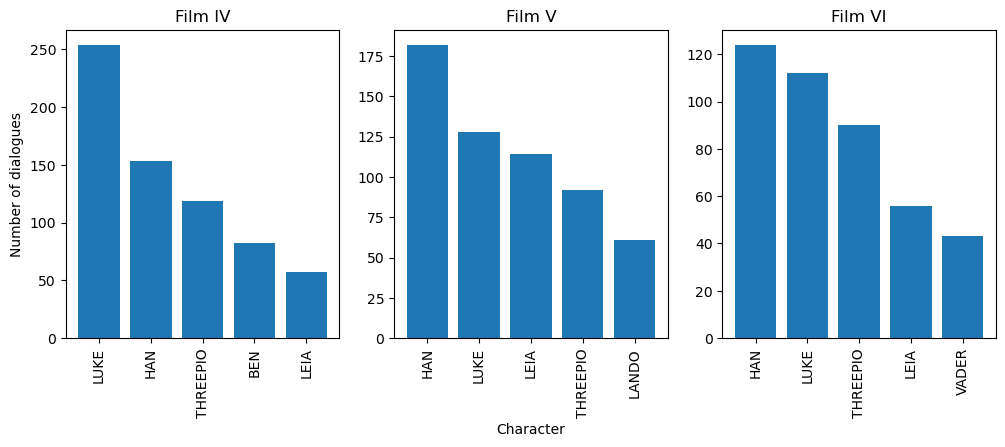

In [12]:
#task 2

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

#Film IV
top5_IV = script_numIV.head()
axs[0].bar(top5_IV['character'], top5_IV['nº dialogues'])
axs[0].set_ylabel('Number of dialogues')
axs[0].set_title('Film IV')
axs[0].tick_params(axis='x', rotation=90)

#Film V
top5_V = script_numV.head()
axs[1].bar(top5_V['character'], top5_V['nº dialogues'])
axs[1].set_xlabel('Character')
axs[1].set_title('Film V')
axs[1].tick_params(axis='x', rotation=90)

#Film VI
top5_VI = script_numVI.head()
axs[2].bar(top5_VI['character'], top5_VI['nº dialogues'])
axs[2].set_title('Film VI')
axs[2].tick_params(axis='x', rotation=90)

In [13]:
#task 3
episodeIV['episode'] = "IV"
episodeV['episode'] = "V"
episodeVI['episode'] = "VI"

trilogy = pd.concat([episodeIV, episodeV, episodeVI], ignore_index=True)
trilogy

,character,dialogue,episode
0,THREEPIO,Did you hear that? They've shut down the main...,IV
1,THREEPIO,We're doomed!,IV
2,THREEPIO,There'll be no escape for the Princess this time.,IV
3,THREEPIO,What's that?,IV
4,THREEPIO,I should have known better than to trust the l...,IV
...,...,...,...
2518,LANDO,"Wedge, I don't think we're going to make it.",VI
2519,WEDGE,You'll make it. Just follow me Gold Leader.,VI
2520,LANDO,I promised to return his ship without a scratc...,VI
2521,HAN,Lando...,VI


In [14]:
#task 4

all_words = trilogy.dialogue.str.split().explode()

# Create a DataFrame with the words
word_df = pd.DataFrame({'word': all_words})
word_df

,word
0,Did
0,you
0,hear
0,that?
0,They've
...,...
2520,me.
2521,Lando...
2522,They
2522,did


In [15]:
word_freq = word_df['word'].value_counts()
word_freq

the            793
I              663
to             636
you            562
a              415
              ... 
cares            1
anything...      1
anyone.          1
care!            1
Lando...         1
Name: word, Length: 5155, dtype: int64

Text(0.5, 1.0, 'Top 25 Most Repeated Words')

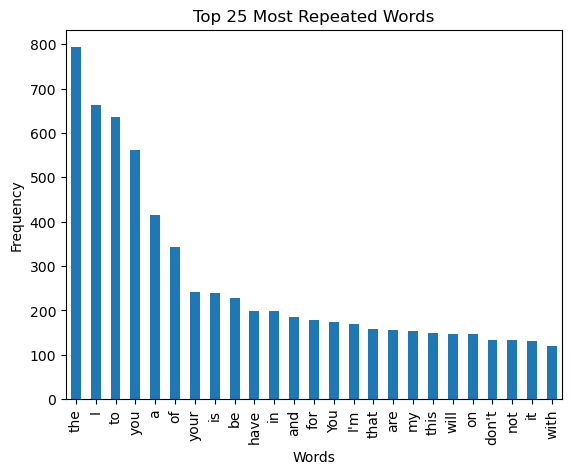

In [16]:
#task 5
top_25_words = word_freq.head(25)
top_25_words.plot(kind='bar')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 25 Most Repeated Words')

In [17]:
#task 6

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk as nlp

description_list=[]
for description in trilogy.dialogue:
    description=re.sub("[^a-zA-Z]", " ", description)
    description=description.lower()
    description=nltk.word_tokenize(description)
    description=[word for word in description if not word in set(stopwords.words("english"))]
    lemma=nlp.WordNetLemmatizer()
    description=[lemma.lemmatize(word) for word in description]
    description=" ".join(description)
    description_list.append(description)
    

In [18]:
trilogy["new_script"]=description_list
trilogy

,character,dialogue,episode,new_script
0,THREEPIO,Did you hear that? They've shut down the main...,IV,hear shut main reactor destroyed sure madness
1,THREEPIO,We're doomed!,IV,doomed
2,THREEPIO,There'll be no escape for the Princess this time.,IV,escape princess time
3,THREEPIO,What's that?,IV,
4,THREEPIO,I should have known better than to trust the l...,IV,known better trust logic half sized thermocaps...
...,...,...,...,...
2518,LANDO,"Wedge, I don't think we're going to make it.",VI,wedge think going make
2519,WEDGE,You'll make it. Just follow me Gold Leader.,VI,make follow gold leader
2520,LANDO,I promised to return his ship without a scratc...,VI,promised return ship without scratch sure hope...
2521,HAN,Lando...,VI,lando


In [19]:
#task 7
all_words_new = trilogy.new_script.str.split().explode()

# Create a DataFrame with the words
word_df_new = pd.DataFrame({'word': all_words_new})

word_freq_new = word_df_new['word'].value_counts()
word_freq_new

luke            137
get             130
going           121
right           113
oh              113
               ... 
required          1
demonstrated      1
provided          1
analysis          1
forgives          1
Name: word, Length: 2458, dtype: int64

Text(0.5, 1.0, 'Top 25 Most Repeated Words')

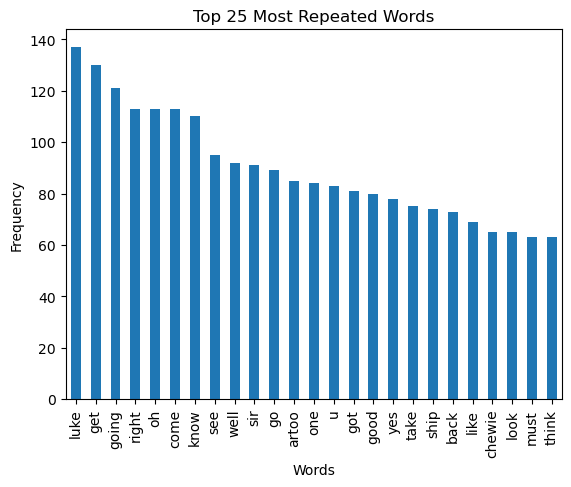

In [20]:
top_25_words = word_freq_new.head(25)
top_25_words.plot(kind='bar')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 25 Most Repeated Words')

In [21]:
#task 8

yoda=trilogy[trilogy.character=="YODA"]
vader=trilogy[trilogy.character=="VADER"]

all_words_yoda = trilogy.new_script.str.split().explode()
all_words_vader = trilogy.new_script.str.split().explode()

word_df_yoda = pd.DataFrame({'word': all_words_yoda})
word_df_vader = pd.DataFrame({'word': all_words_vader})

word_freq_yoda = word_df_yoda['word'].value_counts()
word_freq_vader = word_df_vader['word'].value_counts()

In [22]:
import numpy as np
from PIL import Image

mask_yoda = np.array(Image.open(r'C:\Users\jrodr\OneDrive\Documentos\BI Dalarna University\Business Intelligence\Labs\Lab 4\wordcloud_masks\yoda.png'))
mask_vader = np.array(Image.open(r'C:\Users\jrodr\OneDrive\Documentos\BI Dalarna University\Business Intelligence\Labs\Lab 4\wordcloud_masks\vader.jpg'))

Text(0.5, 1.0, 'Yoda')

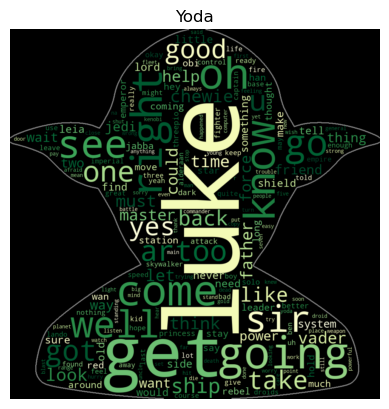

In [23]:
from wordcloud import WordCloud,STOPWORDS
stopwords= set(STOPWORDS)


wordcloud_yoda = WordCloud(mask=mask_yoda,colormap="YlGn",contour_width=2, contour_color="gray").generate_from_frequencies(word_freq_yoda)
plt.imshow(wordcloud_yoda, interpolation='bilinear')
plt.axis('off')
plt.title('Yoda')

Text(0.5, 1.0, 'Darth Vader')

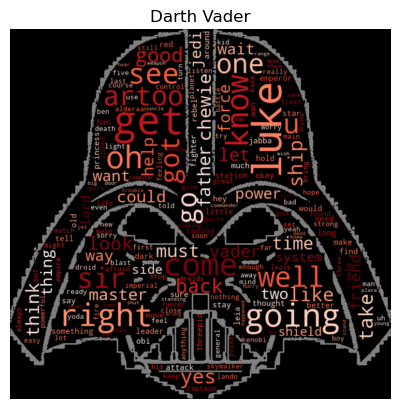

In [24]:
stopwords= set(STOPWORDS)

wordcloud_vader = WordCloud(mask=mask_vader,colormap="Reds",contour_width=2, contour_color="gray").generate_from_frequencies(word_freq_vader)
plt.imshow(wordcloud_vader, interpolation='bilinear')
plt.axis('off')
plt.title('Darth Vader')


In [25]:
#task 9

from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
word_count_vector=vectorizer.fit_transform(description_list)
word_count_vector.shape

(2523, 2451)

In [26]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=vectorizer.get_feature_names_out(),columns=["idf_weights"]) 
df_idf.sort_values(by=['idf_weights'])

,idf_weights
get,4.013319
luke,4.071426
going,4.088668
know,4.170161
come,4.189209
...,...
distress,8.140453
picking,8.140453
disturbed,8.140453
pitiful,8.140453


In [27]:
count_vector=vectorizer.transform(description_list) 
tf_idf_vector=tfidf_transformer.transform(count_vector)
feature_names = vectorizer.get_feature_names_out() 
first_document_vector=tf_idf_vector[0] 
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
madness,0.473183
reactor,0.400363
destroyed,0.385755
shut,0.360072
hear,0.356062
...,...
feeble,0.000000
feel,0.000000
feeling,0.000000
feisty,0.000000


In [28]:
#task 10
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
sent = SentimentIntensityAnalyzer()

scores = [] 

for description in description_list:
    sentiment_scores = sent.polarity_scores(description)
    scores.append(sentiment_scores)

scores_df = pd.DataFrame(scores)
scores_df

,neg,neu,pos,compound
0,0.492,0.323,0.185,-0.5859
1,1.000,0.000,0.000,-0.6369
2,0.000,0.541,0.459,0.1779
3,0.000,0.000,0.000,0.0000
4,0.000,0.530,0.470,0.7351
...,...,...,...,...
2518,0.000,1.000,0.000,0.0000
2519,0.000,1.000,0.000,0.0000
2520,0.281,0.385,0.334,0.2100
2521,0.000,1.000,0.000,0.0000


Text(0.5, 1.0, 'Trilogy Sentiment Analysis')

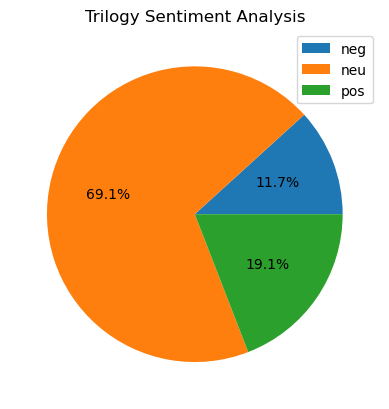

In [29]:
total_amount = scores_df[['neg', 'neu', 'pos']].sum(axis=0)

plt.pie(total_amount, autopct='%1.1f%%')
plt.legend( scores_df[['neg', 'neu', 'pos']])
plt.title("Trilogy Sentiment Analysis")

In [30]:
#same for Yoda only
scores = [] 
for words in yoda["new_script"]:
    sentiment_scores = sent.polarity_scores(words)
    scores.append(sentiment_scores)

scores_df = pd.DataFrame(scores)
scores_df

,neg,neu,pos,compound
0,0.402,0.326,0.272,-0.2960
1,0.000,0.286,0.714,0.3612
2,0.163,0.542,0.296,0.7845
3,0.000,0.597,0.403,0.4019
4,0.000,1.000,0.000,0.0000
5,0.000,1.000,0.000,0.0000
6,0.295,0.470,0.235,-0.4019
7,0.000,0.417,0.583,0.4215
8,0.000,0.340,0.660,0.8643
9,0.238,0.762,0.000,-0.2924


Text(0.5, 1.0, 'Yoda Sentiment Analysis')

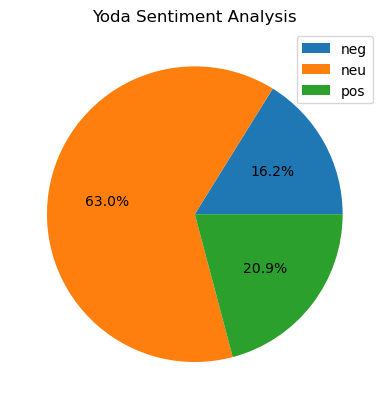

In [31]:
total_amount = scores_df[['neg', 'neu', 'pos']].sum(axis=0)

plt.pie(total_amount, autopct='%1.1f%%')
plt.legend( scores_df[['neg', 'neu', 'pos']])
plt.title("Yoda Sentiment Analysis")

In [32]:
#same for Darth Vader only
scores = [] 
for words in vader["new_script"]:
    sentiment_scores = sent.polarity_scores(words)
    scores.append(sentiment_scores)

scores_df = pd.DataFrame(scores)
scores_df

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,1.000,0.000,0.0000
2,0.000,0.672,0.328,0.4404
3,0.159,0.606,0.235,0.2500
4,0.242,0.758,0.000,-0.1531
...,...,...,...,...
135,0.459,0.541,0.000,-0.1779
136,0.174,0.249,0.577,0.8271
137,0.381,0.424,0.195,-0.6597
138,0.000,0.526,0.474,0.4019


Text(0.5, 1.0, 'Darth Vader Sentiment Analysis')

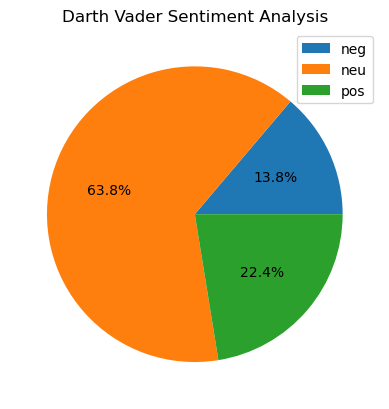

In [33]:
total_amount = scores_df[['neg', 'neu', 'pos']].sum(axis=0)

plt.pie(total_amount, autopct='%1.1f%%')
plt.legend( scores_df[['neg', 'neu', 'pos']])
plt.title("Darth Vader Sentiment Analysis")